<a href="https://colab.research.google.com/github/mukami3juma/house_pricing/blob/main/WEEK_7_IP_HOUSE_PRICING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question


## a) Specifying the Question
Hass Consulting Company offers investment-grade developments all over the City. It therefore wants to create a model that would allow it to accurately predict the sale of prices based upon the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

## b) Defining the Metric for Success
This project will be considered successful if the models created are able to predict the price of houses at an accuracy rate of atleast 70% but below 100% and have the lowest RMSE score possible.

## c) Understanding the context
Hass Consulting Company was formed in 1992 with a vision to establish a comprehensive Real Estate firm that reinvented the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards.

It works towards new innovations and continually brings dynamism to the industry in Kenya-be it launch of off-plan developments or introduction of versatile financial structures for property developments, which have propelled the industry into new directions.

## d) Experimental Design
In order to work on the above problem we will determine the appropriateness of the available data to answer the given question, find and deal with outliers, anomalies, and missing data within the dataset, perform an EDA recording the observations, performing regression analysis, incorporating categorical independent variables into the models,check for multicollinearity, provide a recommendation based on the analysis, create residual plots for the models, and assess heteroskedasticity using Barlett's test. We shall perform modeling using the Multiple Linear, Quantile,Ridge, Lasso and Elastic net regression techniques then evaluate their performance. We will then record our observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem.


## e) Data Relevance
The relavance of our data is backed by a house pricing dataset consisting of sufficient samples and features that will be used for this problem. 

# 2. Loading Data


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
# load data
house = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,"221,900",3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-122,1340,5650
1,6414100192,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,48,-122,1690,7639
2,5631500400,"180,000",2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,48,-122,2720,8062
3,2487200875,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,48,-122,1360,5000
4,1954400510,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,48,-122,1800,7503


# 3. Data Preprocessing

In [ ]:
# check columns
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [ ]:
# check stats for dataset
pd.options.display.float_format = '{:.5f}'.format
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540182.15879,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31205,367362.23172,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [ ]:
house.shape

(21613, 20)

In [ ]:
# checking for null values
house.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
house.index

RangeIndex(start=0, stop=21613, step=1)

In [ ]:
# checking for duplicates
house.duplicated().sum()

3

In [ ]:
# removing duplicates,and remaining with size of dataset after
house = house.drop_duplicates(subset=None, keep='first', inplace=False)
house.shape

(21610, 20)

In [ ]:
# checking for anomalies
for i in house:
  print(house[i].unique())
  

[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
[221900. 538000. 180000. ... 541800. 610685. 402101.]
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
[1180 2570  770 ... 3087 3118 1425]
[ 5650  7242 10000 ...  5813  2388  1076]
[1.  2.  1.5 3.  2.5 3.5]
[0 1]
[0 3 4 2 1]
[3 5 4 1 2]
[ 7  6  8 11  9  5 10 12  4  3 13  1]
[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 1450 1720 2910 1620
 1360 2070

# 4. Feature Engineering

In [ ]:
 # checking the variables' data types
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  float64
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

In [ ]:
# converting floor datatype from float to integer as there is no fraction of a floor
house['floors'] = house['floors'].astype(int)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  int64  
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

There will not be a need to encode as there are no categorical variables(object datatype) in the dataset.

# 5. Exporatory Data Analysis

## Univariate analysis

In [ ]:
# we focus on the target variable
house['price'].describe()

count     21610.00000
mean     540178.94484
std      367387.58505
min       75000.00000
25%      321612.50000
50%      450000.00000
75%      645000.00000
max     7700000.00000
Name: price, dtype: float64

In [ ]:
# converting our prices feature into categorical data

bins = [75000.00000,540178.94484,7700000.00000]
group_names = ['basic','advanced']
house['price'] = pd.cut(house['price'], bins, labels=group_names)
house


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,basic,3,1.00000,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,basic,3,2.25000,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,basic,2,1.00000,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,advanced,4,3.00000,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,basic,3,2.00000,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,basic,3,2.50000,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,basic,4,2.50000,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,basic,2,0.75000,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,basic,3,2.50000,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21610 non-null  int64   
 1   price          21609 non-null  category
 2   bedrooms       21610 non-null  int64   
 3   bathrooms      21610 non-null  float64 
 4   sqft_living    21610 non-null  int64   
 5   sqft_lot       21610 non-null  int64   
 6   floors         21610 non-null  int64   
 7   waterfront     21610 non-null  int64   
 8   view           21610 non-null  int64   
 9   condition      21610 non-null  int64   
 10  grade          21610 non-null  int64   
 11  sqft_above     21610 non-null  int64   
 12  sqft_basement  21610 non-null  int64   
 13  yr_built       21610 non-null  int64   
 14  yr_renovated   21610 non-null  int64   
 15  zipcode        21610 non-null  int64   
 16  lat            21610 non-null  float64 
 17  long           21610 non-null  

In [ ]:
# plotting for the categorical features frequencies
price = house['price'].value_counts()
price

basic       13693
advanced     7916
Name: price, dtype: int64

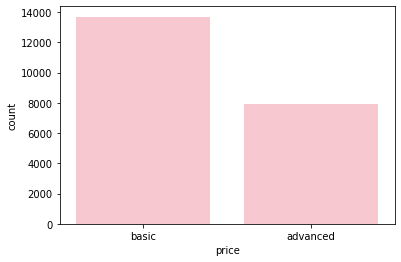

In [ ]:
# plotting to see the frequency distribution of house prices
sb.countplot(house.price,color='Pink')

Here we see that more basic priced houses are bought than advanced

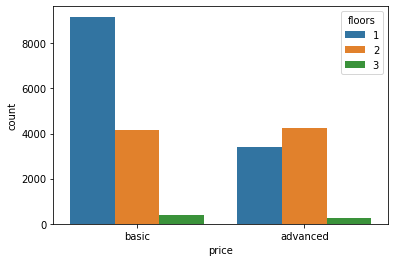

In [ ]:
# to determine the number of floors the category of houses have
sb.countplot(house.price, hue = house.floors)

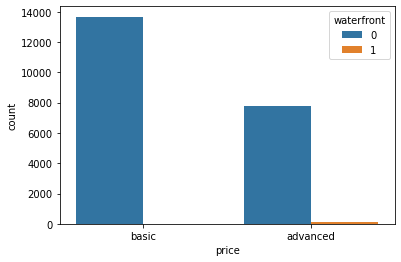

In [ ]:
# to determine the number of waterfronts the category of houses have
sb.countplot(house.price, hue = house.waterfront)

We notice that waterfronts are not common attributes if houses sold and basic houses have no waterfront feature

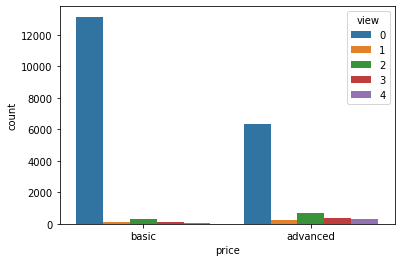

In [ ]:
# to determine the number of views the category of houses have
sb.countplot(house.price, hue = house.view)

Pricier houses have more views feature than the cheaper ones

## Bivariate Analysis

*Numerical vs numerical*

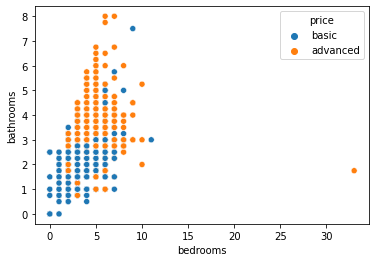

In [ ]:
# determine relationships between predictor variables
sb.scatterplot(x = 'bedrooms',y = 'bathrooms' ,data = house,hue='price')
plt.show()

In [ ]:
house.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,basic,3,1.00000,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650


#6. Splitting Datasets into training and test datasets

In [ ]:
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,basic,3,1.00000,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,basic,3,2.25000,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,basic,2,1.00000,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,advanced,4,3.00000,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,basic,3,2.00000,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [ ]:
# converting categorical data into numerical
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
house['price_num'] = oe.fit_transform(house[['price']])
house[['price_num', 'price']].head()

,price_num,price
0,1.00000,basic
1,1.00000,basic
2,1.00000,basic
3,0.00000,advanced
4,1.00000,basic


In [ ]:
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_num
0,7129300520,basic,3,1.00000,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650,1.00000
1,6414100192,basic,3,2.25000,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639,1.00000
2,5631500400,basic,2,1.00000,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062,1.00000
3,2487200875,advanced,4,3.00000,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000,0.00000
4,1954400510,basic,3,2.00000,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503,1.00000


In [ ]:
# # creating predictor(x) and target variables(y)
# x = house.iloc[:,0:9]
# y = house.drop(['price'],axis = 1)
# from sklearn.model_selection import train_test_split


# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

## Feature Scaling

This method is used to normalize the range of predictor variables so that when their values vary alot, all values remain in the same comparable range

In [ ]:
# # standardizing the data for somewhat even scale of measurement
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = norm.fit_transform(x_train)
# x_test = norm.fit_transform(x_test)

## Checking for multicollinearity

In [ ]:
# Remove the target variable(price) since we want to focus on predictor variables only.
predictor_var = house.drop('price', axis =1)

# determining correlations between the variables
correlations = predictor_var.corr()
correlations

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_num
id,1.00000,0.00135,0.00509,-0.01224,-0.13210,0.01907,-0.00272,0.01179,-0.02369,0.00809,-0.01086,-0.00508,0.02122,-0.01669,-0.00813,-0.00186,0.02078,-0.00287,-0.13878,-0.00576
bedrooms,0.00135,1.00000,0.51593,0.57667,0.03170,0.15566,-0.00658,0.07943,0.02842,0.35700,0.47762,0.30308,0.15428,0.01870,-0.15272,-0.00895,0.12947,0.39163,0.02923,-0.28181
bathrooms,0.00509,0.51593,1.00000,0.75469,0.08775,0.51904,0.06375,0.18789,-0.12494,0.66499,0.68535,0.28381,0.50600,0.05088,-0.20383,0.02459,0.22305,0.56867,0.08719,-0.41023
sqft_living,-0.01224,0.57667,0.75469,1.00000,0.17283,0.35333,0.10382,0.28464,-0.05877,0.76272,0.87660,0.43505,0.31810,0.05531,-0.19943,0.05252,0.24022,0.75642,0.18329,-0.54835
sqft_lot,-0.13210,0.03170,0.08775,0.17283,1.00000,-0.00892,0.02160,0.07475,-0.00897,0.11364,0.18353,0.01527,0.05311,0.00768,-0.12961,-0.08568,0.22955,0.14462,0.71856,-0.09045
floors,0.01907,0.15566,0.51904,0.35333,-0.00892,1.00000,0.01965,0.02453,-0.29319,0.47258,0.51790,-0.23580,0.57866,-0.00798,-0.09665,0.02954,0.15892,0.29654,-0.01323,-0.21167
waterfront,-0.00272,-0.00658,0.06375,0.10382,0.02160,0.01965,1.00000,0.40199,0.01665,0.08278,0.07208,0.08058,-0.02616,0.09295,0.03028,-0.01427,-0.04190,0.08647,0.03070,-0.09357
view,0.01179,0.07943,0.18789,0.28464,0.07475,0.02453,0.40199,1.00000,0.04584,0.25138,0.16766,0.27700,-0.05323,0.10321,0.08484,0.00605,-0.07856,0.28040,0.07258,-0.25701
condition,-0.02369,0.02842,-0.12494,-0.05877,-0.00897,-0.29319,0.01665,0.04584,1.00000,-0.14465,-0.15821,0.17407,-0.36135,-0.06086,0.00296,-0.01497,-0.10651,-0.09285,-0.00342,-0.05103
grade,0.00809,0.35700,0.66499,0.76272,0.11364,0.47258,0.08278,0.25138,-0.14465,1.00000,0.75592,0.16844,0.44697,0.01437,-0.18480,0.11409,0.19835,0.71321,0.11927,-0.56173


The above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Using the correlations to compute the VIF score for each variable we create a new dataframe with the inverse of the matrix above

In [ ]:
# creating a VIF dataframe to rule out multicollinearity
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_num
id,1.02815,-0.00097,-0.00403,-1314.27533,0.07781,-0.00638,0.00748,-0.03443,0.02379,-0.03857,1185.00843,633.30968,0.01614,0.01822,-0.00314,0.01477,-0.07536,0.01140,0.10463,-0.00001
bedrooms,-0.00097,1.65681,-0.48067,-498.34500,0.05077,0.11418,0.06315,0.11309,-0.04803,0.30107,448.43195,239.66847,0.10508,0.04150,0.07616,0.04712,0.02305,0.03021,0.08831,-0.00000
bathrooms,-0.00403,-0.48067,3.34443,-4364.94485,-0.02525,-0.69770,0.00860,-0.04123,-0.13686,-0.27421,3934.22452,2102.26784,-0.84478,-0.24909,0.03484,-0.04200,0.05118,0.11205,0.06615,-0.00002
sqft_living,-1314.27533,-498.34500,-4364.94485,-4859789593.48307,-3531.45565,-6664.45887,-484.88916,-5628.15849,-6559.06721,-31767.35642,4381671407.44905,2341774293.03205,21945.62186,-1229.58279,3726.45198,-23588.95252,1165.55229,-13772.86642,1077.68378,-96524.70897
sqft_lot,0.07781,0.05077,-0.02525,-3531.45565,2.10857,0.05053,0.02803,-0.06187,0.03247,-0.05680,3183.83677,1701.65615,0.09230,0.02167,-0.00266,0.05425,-0.13836,0.16389,-1.45088,-0.00002
floors,-0.00638,0.11418,-0.69770,-6664.45887,0.05053,2.21385,-0.00126,-0.04572,0.09394,-0.22525,6008.35846,3211.99904,-0.80155,-0.12155,-0.15983,-0.13322,0.18451,0.22661,0.09225,-0.00004
waterfront,0.00748,0.06315,0.00860,-484.88916,0.02803,-0.00126,1.20401,-0.49319,-0.01245,0.04848,437.07311,233.65069,-0.02187,-0.06587,0.02216,0.00964,0.02704,0.05510,-0.01757,-0.00000
view,-0.03443,0.11309,-0.04123,-5628.15849,-0.06187,-0.04572,-0.49319,1.43663,-0.02209,-0.18391,5074.50091,2711.77763,0.15819,-0.03880,-0.14062,0.11835,0.07391,-0.32505,-0.01145,-0.00003
condition,0.02379,-0.04803,-0.13686,-6559.06721,0.03247,0.09394,-0.01245,-0.02209,1.25004,-0.05469,5913.84906,3160.51100,0.54932,0.20574,0.16204,0.06410,-0.00813,0.07363,-0.02512,-0.00004
grade,-0.03857,0.30107,-0.27421,-31767.35642,-0.05680,-0.22525,0.04848,-0.18391,-0.05469,3.41485,28640.47819,15307.22274,-0.61307,-0.06897,0.07996,-0.33253,0.39665,-0.90386,0.06681,-0.00017


The VIF score for each variable is found alongside the downwards sloping diagonal. sqft_living has a score of -4,859,789,593.48307, sqft_above has a score of -3,950,591,672.65565 and sqft_basement a score of -1,128,424,744.38723 which are way above 5 showing presence of multicolinearity. However, the rest of the predictor variables are way below 5, hence we can't conclude there's multicolinearity on their end.

sqft_living having the largest value above 5, let's see how the VIF scores improve if we remove it from our dataset.

In [ ]:
# dropping the sqft_living predictor
predictor_var = predictor_var.drop(['sqft_living'],axis =1)

# determining the new correlations between predictor variables
correlations = predictor_var.corr()

# checking the new VIF dataframe
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,id,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_num
id,1.02850,-0.00084,-0.00285,0.07876,-0.00458,0.00761,-0.03291,0.02556,-0.02998,0.03478,0.00321,0.01021,0.01856,-0.00415,0.02115,-0.07568,0.01512,0.10434,0.02610
bedrooms,-0.00084,1.65686,-0.48023,0.05113,0.11487,0.06319,0.11366,-0.04736,0.30432,-0.88462,-0.46775,0.10283,0.04163,0.07578,0.04954,0.02293,0.03162,0.08820,0.00990
bathrooms,-0.00285,-0.48023,3.34835,-0.02208,-0.69172,0.00903,-0.03617,-0.13097,-0.24568,-1.28620,-1.05690,-0.86450,-0.24798,0.03149,-0.02081,0.05013,0.12442,0.06518,0.08667
sqft_lot,0.07876,0.05113,-0.02208,2.11114,0.05537,0.02838,-0.05778,0.03724,-0.03372,-0.18549,-0.03729,0.07635,0.02256,-0.00537,0.07139,-0.13920,0.17390,-1.45166,0.07012
floors,-0.00458,0.11487,-0.69172,0.05537,2.22299,-0.00059,-0.03800,0.10294,-0.18168,-0.43437,0.61341,-0.83165,-0.11986,-0.16494,-0.10087,0.18292,0.24549,0.09077,0.13233
waterfront,0.00761,0.06319,0.00903,0.02838,-0.00059,1.20406,-0.49263,-0.01180,0.05165,-0.11146,-0.00160,-0.02406,-0.06575,0.02179,0.01200,0.02693,0.05648,-0.01768,0.00963
view,-0.03291,0.11366,-0.03617,-0.05778,-0.03800,-0.49263,1.44314,-0.01449,-0.14712,0.05465,-0.24861,0.13278,-0.03738,-0.14493,0.14567,0.07256,-0.30910,-0.01270,0.11176
condition,0.02556,-0.04736,-0.13097,0.03724,0.10294,-0.01180,-0.01449,1.25889,-0.01181,0.07920,-0.08982,0.51970,0.20740,0.15701,0.09593,-0.00970,0.09222,-0.02657,0.13024
grade,-0.02998,0.30432,-0.24568,-0.03372,-0.18168,0.05165,-0.14712,-0.01181,3.62251,-1.52670,-0.43147,-0.75652,-0.06093,0.05560,-0.17833,0.38903,-0.81383,0.05977,0.63079
sqft_above,0.03478,-0.88462,-1.28620,-0.18549,-0.43437,-0.11146,0.05465,0.07920,-1.52670,4.93513,1.38860,0.49804,0.00799,-0.09698,0.24789,-0.34409,-1.47198,-0.17667,0.29085


The VIF scores for the features reduce significantly with exception to sqft_above which has a VIF score of 4.93513 which is quite near 5. We then drop it to see the effect it has on the VIF dataframe

In [ ]:
# dropping the sqft_above predictor
predictor_var = predictor_var.drop(columns=['sqft_above'])

# determining the new correlations between predictor variables
correlations = predictor_var.corr()

# checking the new VIF dataframe
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,id,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_num
id,1.02826,0.00540,0.00622,0.08007,-0.00152,0.00839,-0.03329,0.02500,-0.01922,-0.00658,0.00670,0.01850,-0.00346,0.01941,-0.07325,0.02550,0.10559,0.02405
bedrooms,0.00540,1.49830,-0.71078,0.01788,0.03700,0.04322,0.12346,-0.03316,0.03066,-0.21885,0.19211,0.04306,0.05840,0.09397,-0.03875,-0.23223,0.05653,0.06203
bathrooms,0.00622,-0.71078,3.01314,-0.07042,-0.80493,-0.02002,-0.02193,-0.11033,-0.64357,-0.69500,-0.73470,-0.24590,0.00622,0.04380,-0.03954,-0.25921,0.01913,0.16248
sqft_lot,0.08007,0.01788,-0.07042,2.10417,0.03905,0.02419,-0.05573,0.04021,-0.09110,0.01490,0.09507,0.02286,-0.00902,0.08071,-0.15214,0.11858,-1.45830,0.08105
floors,-0.00152,0.03700,-0.80493,0.03905,2.18476,-0.01040,-0.03319,0.10991,-0.31606,0.73563,-0.78781,-0.11916,-0.17348,-0.07906,0.15263,0.11593,0.07522,0.15793
waterfront,0.00839,0.04322,-0.02002,0.02419,-0.01040,1.20154,-0.49139,-0.01001,0.01717,0.02976,-0.01281,-0.06557,0.01960,0.01760,0.01916,0.02323,-0.02167,0.01620
view,-0.03329,0.12346,-0.02193,-0.05573,-0.03319,-0.49139,1.44254,-0.01537,-0.13021,-0.26399,0.12726,-0.03747,-0.14386,0.14293,0.07637,-0.29280,-0.01074,0.10854
condition,0.02500,-0.03316,-0.11033,0.04021,0.10991,-0.01001,-0.01537,1.25762,0.01269,-0.11210,0.51171,0.20728,0.15857,0.09195,-0.00418,0.11584,-0.02374,0.12557
grade,-0.01922,0.03066,-0.64357,-0.09110,-0.31606,0.01717,-0.13021,0.01269,3.15022,-0.00190,-0.60245,-0.05846,0.02560,-0.10165,0.28258,-1.26920,0.00511,0.72077
sqft_basement,-0.00658,-0.21885,-0.69500,0.01490,0.73563,0.02976,-0.26399,-0.11210,-0.00190,1.60606,0.00205,-0.02317,-0.05074,-0.11419,0.24275,-0.05858,-0.00816,0.05745


We now see the scores drop to less than 5. This shows sqft_living and sqft_above were colinear.






In [ ]:
# checking for null values in the new dataset
predictor_var.isnull().sum()

id               0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price_num        1
dtype: int64

In [ ]:
# removing the null value
predictor_var.dropna(axis=0,subset=['price_num'], inplace=True)

# 7. Fitting a Mutiple Linear Regression Model

In [ ]:
predictor_var.isnull().sum()

id               0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price_num        0
dtype: int64

In [ ]:
predictor_var.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_num'], dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression

x = predictor_var.drop(columns = 'price_num')
y = predictor_var['price_num']


# determining train and test datasets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

reg = LinearRegression()
reg.fit(x_train, y_train)


# checking the coeff and intercept
print(reg.coef_)
print(reg.intercept_)

# This is our prediction for price based on our model
y_predict = reg.predict(x_test)


[-2.67069906e-12 -1.96511461e-02 -5.35229032e-02 -4.28293009e-07
 -6.85446574e-02 -5.20093567e-02 -3.37696968e-02 -5.07694507e-02
 -1.54573579e-01 -2.65533534e-05  3.98214605e-03 -1.69234898e-05
  3.59013393e-04 -8.41378684e-01  1.21073669e-02 -1.36534957e-04
  1.16959712e-07]
1.010092637140263


In [ ]:
# placing the coeff in a dataframe
pd.DataFrame(reg.coef_, x.columns,columns = ['coeff'])

,coeff
id,-0.00000
bedrooms,-0.01965
bathrooms,-0.05352
sqft_lot,-0.00000
floors,-0.06854
waterfront,-0.05201
view,-0.03377
condition,-0.05077
grade,-0.15457
sqft_basement,-0.00003


## Determining the model's performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error: ',y_test_mse)

y_test_r2 = r2_score(y_test, y_predict)
print('RSME: ',y_test_r2)

Mean Squared Error:  0.12070094371043849
RSME:  0.4794382506700161


Since our RMSE falls between 0.2 and 0.5,it shows that the model can relatively predict the data accurately. 

## Creating Residual Plots


In [ ]:
# We now create the residuals by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()


,price_num
count,4322.00000
mean,-0.00155
std,0.34746
min,-1.02651
25%,-0.26773
50%,-0.05274
75%,0.25076
max,1.15657


In [ ]:
residuals.mean()

-0.001545242136053519

A residual is a measure of how well a line fits an individual data point. This vertical distance is known as a residual. For data points above the line, the residual is positive, and for data points below the line, the residual is negative. The closer a data point's residual is to 0, the better the fit.

Remembering that we are trying to predict the sales of price of a house. This means values between 0 and 1. 
The min and max for the residual are high: they suggest we've been up to 115% off target. It's important for us to plot this first.

Our mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 0.15%

Let's show the residual plot

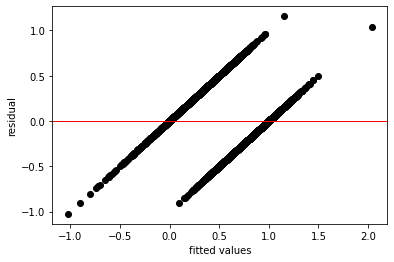

In [ ]:
# plotting the residuals
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Our residuals are exhibiting obvious patterns where the residual variance increases as the fitted values increase. To confirm this,we will perform a heteroskedasticity test using bartlett test.

## Performing a heteroscedasticity test

From the residual plot we see there's unequal scatter that produces a distinctive fan or cone shape. Notice that the fitted values increases as the vertical range of the residuals increase.


In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('Critical value: ',critical_value)
print('Test result: ',test_result)
print('P value:',p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


Critical value:  4547.989050605785
Test result:  7.025939290881262
P value: 0.008033732008134346
the variances are homogeneous!


This Bartlett test however disapproves our earlier assumption and shows there is not heteroscedasticity

# 8. Fitting a Quantile Regression Model

Since linear regression models make a key assumption that the error term has a constant variance across the values of independent variable x, when the assumption is no longer true, quantile regression is used. However, the linear model above satisfies the homogenous variance assumption hence there is no point in using quantile regression.

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
# using our initial dataset house

# 9. Fitting a Ridge Regression Model

In [ ]:
# installing !pip install pydataset and importing pydataset so as to use a dataset from the package
# 
!pip install pydataset
from pydataset import data

import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# loading and splitting  data 
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
x = df.drop(columns=['price'])
y = df['price']

In [ ]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
r = LinearRegression()
r.fit(x,y)
first_model = (mean_squared_error(y_true=y,y_pred=r.predict(x)))
print('Linear MSE: ', first_model)

# The output determines if the regularized ridge regression model is superior or not.

Linear MSE:  40504545596.74061


In [ ]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(x,y)
search.best_params_
{'alpha': 0.5}
abs(search.best_score_) 

41008448117.006424

The best_params_ tells us what to set alpha to which in this case is 0.5. The best_score_ tells us what the best possible mean squared error is. 
In this case, the best score is slightly higher than the linearmodel's MSE.

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(x,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
print('Ridge MSE:', second_model)

Ridge MSE: 40510876989.49505


This is slightly higher than the linear model's MSE.

In [ ]:
# These results indicate that there is little difference between the ridge and baseline models
# confirmed by the coefficients of the linear and ridge models found below.

coef_dict_baseline = {}
for coef, feat in zip(r.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline



{'bathrooms': 41178.2193326215,
 'bedrooms': -35794.70082616536,
 'condition': 26281.378023074532,
 'floors': 6770.677802313043,
 'grade': 96102.80646879715,
 'id': -1.2940848386492642e-06,
 'lat': 602429.9072948734,
 'long': -213015.28508999987,
 'sqft_above': 70.73173031369505,
 'sqft_basement': 39.736123229862066,
 'sqft_living': 110.46785355024373,
 'sqft_living15': 21.619850530746195,
 'sqft_lot': 0.12161436171463393,
 'sqft_lot15': -0.3963195209216792,
 'view': 53095.22356586893,
 'waterfront': 582707.3515341072,
 'yr_built': -2624.447978304517,
 'yr_renovated': 19.65667335475155,
 'zipcode': -582.3992285746106}

In [ ]:
# ridge coefficients
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 40894.236379826056,
 'bedrooms': -34567.13653335848,
 'condition': 26663.83898710321,
 'floors': 7378.8287933450665,
 'grade': 94325.52062905837,
 'id': -1.279085825117891e-06,
 'lat': 597878.0011171924,
 'long': -211322.22457339807,
 'sqft_above': 90.94536041498777,
 'sqft_basement': 61.19774056258487,
 'sqft_living': 88.14271777184366,
 'sqft_living15': 24.423781870192435,
 'sqft_lot': 0.1204885400528947,
 'sqft_lot15': -0.3851691525229884,
 'view': 53116.15242866588,
 'waterfront': 578462.8183807625,
 'yr_built': -2560.07283276117,
 'yr_renovated': 20.751218340124,
 'zipcode': -560.9083557651256}

The coefficient values for both models are about the same meaning that the penalization made a little difference with this dataset.

# 10. Fitting a Lasso Regression Model


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, these values depend on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.


# Importing StandardScaler

from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes

a = df.drop(columns='price')
b = df['price']

# Scaling data 

scaler = StandardScaler()
scaler.fit(a)
a = scaler.transform(a)


In [ ]:
# we will train the whole dataset and look at an R-squared score and on the model coefficients. 
# Alpha,is defined as 1.


# Importing linear models

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object

lasso = linear_model.Lasso() 

# Fitting the models

lasso.fit(a,b) 

# Print scores, MSE, and coefficients

print("lasso score:", lasso.score(a, b)) 
print("lasso MSE:", mean_squared_error(b, lasso.predict(a))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6998524173262097
lasso MSE: 40504545639.722374
lasso coef: [ -3721.47034223 -33289.34283726  31706.64764677 259463.35492305
   5034.05245945   3655.73809075  50412.29416233  40686.90126547
  17100.95285177 112964.85055691 -83886.21166793 -58549.86597024
 -77085.30364978   7894.77484649 -31158.0401249   83471.60682443
 -29995.45369982  14811.69160008 -10818.04221963]


In [ ]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.


# Making necessary imports, split data into training and test sets, and choose a set of parameters

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

a_train, a_test, b_train,b_test = train_test_split(a,b, test_size=0.2, random_state=50)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(a_train, b_train) 
linear.fit(a_train, b_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(a_test, b_test))
print("linear score:", linear.score(a_test, b_test)) 
print("lasso MSE:", mean_squared_error(b_test, gridlasso.predict(a_test)))
print("linear MSE:", mean_squared_error(b_test, linear.predict(a_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7031565890198006
linear score: 0.7031704182370877
lasso MSE: 44733835516.3501
linear MSE: 44731751475.0389
lasso best estimator coef: [ -5236.32037232 -32376.80361522  33921.00689494 203004.05655291
   1669.18715621   3655.47882765  47295.17367545  40272.97893225
  16864.9746037  113092.0874463  -34113.3884651  -32080.6722412
 -77561.37072868   6596.40042981 -29350.21631155  81663.28719727
 -28540.91941278  13009.56516506 -10400.45953442]
linear coef: [ -5258.79597103 -32403.09028346  34077.80413871  81047.03836084
   1753.02193224   3661.99640739  47315.66750074  40272.50235689
  16891.55943083 113030.52792685  75683.87959825  26580.29855218
 -77606.90464117   6614.66857464 -29411.14702003  81696.34295956
 -28599.82337298  13156.75937938 -10473.65901529]


Notice that the linear and lasso scores are hardly different including their MSE scores therefore it is safe to conclude that both models perform similarly in house price prediction.

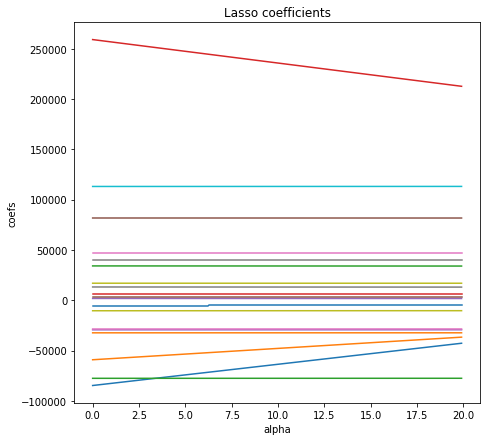

In [ ]:
# data visualization

import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array

alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(a_train, b_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots

plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

Lasso influences the small coefficients reducing them to 0 hence keeping keeping the features that may influence price while it influences large coefficients less.

# 11. Fitting a Elastic Net Regression Model

In [ ]:
!pip install pydataset

from pydataset import data
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 6000)
pd.set_option('display.width', 10000)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Reading data
df =pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [ ]:
# splitting datasets

x=df.drop(columns = 'price')
y=df['price']

In [ ]:
# Creating a linear regression model for comparison purposes

reg=LinearRegression()
reg.fit(x,y)

first_model=(mean_squared_error(y_true=y,y_pred=reg.predict(x)))
print('Linear MSE:' ,first_model) 

# This mean standard error score is our benchmark for determining if the elastic net model will be better or worse. 

Linear MSE: 40504545596.74061


In [ ]:
# Determining the coefficients of this first model
pd.DataFrame(reg.coef_,x.columns,columns = ['coef'])

,coef
id,-0.00000
bedrooms,-35794.70083
bathrooms,41178.21933
sqft_living,110.46785
sqft_lot,0.12161
floors,6770.67780
waterfront,582707.35153
view,53095.22357
condition,26281.37802
grade,96102.80647


In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalized data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
                                                  'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.

search.fit(x,y)
search.best_params_
abs(search.best_score_)

41050144976.8344

In [ ]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.75.
# W will set our hyperparameters to the recommended values and run on the data.
#
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(x,y)

second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print('Elastic MSE: ', second_model)

Elastic MSE:  79369724903.44809


In [ ]:
# determining are the elastic coefficients
pd.options.display.float_format = '{:.5f}'.format

pd.DataFrame(elastic.coef_,x.columns, columns = ['elastic coef'])


,elastic coef
id,-0.00000
bedrooms,9155.70685
bathrooms,23092.63368
sqft_living,28.79838
sqft_lot,0.05852
floors,14348.44366
waterfront,143887.34516
view,21945.40914
condition,5767.40430
grade,22211.44914


The coefficients differ apart from id which has completely been removed from both models as its values are no good to the algorithm.

Overall,the linear has a lower MSE therefore it is a better model for predicting house prices.